In [0]:
# LinearSVC
# based on liblinear, could be used for binary and multi-class classfication

In [0]:
# Lib preparation
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model, model_selection, svm

In [0]:
# diabetes dataset extraction, for regression problem
# diabetes dataset, 442 samples, 10 features(all numeric floats), the label is between integer 25 ~ 346

def load_data_regression():
  diabetes = datasets.load_diabetes()
  return model_selection.train_test_split(diabetes.data, diabetes.target, test_size=.25, random_state=0)

In [0]:
# iris dataset, for classification problem
# 150 dps, 3 classes, 4 features
# we use stratified sampling here, since samples ordered by y_train, the first 50 samples are of label 0 and the later 50 are of label 1
def load_data_classification():
  iris = datasets.load_iris()
  return model_selection.train_test_split(iris.data, iris.target, test_size=.25, random_state=0, stratify=iris.target)

In [0]:
# sklearn.svm.LinearSVC()
## Params
# C: penalty
# loss: a string, could be 'hinge', which means the standard SVM loss. 'squared_hinge' means the squared hinge
# penalty: string, could use 'l1' or 'l2'. The default is 'l2'
# dual: bolean, if True, then solve the dual problem, if False, then solve the original problem. Tend to use False(orginal problem) if n_samples > n_features
# tol: float, threshold to quit iterations
# multi-class: string, the strategies for multiclass classification. 'ovr' means one-vs-rest, 'crammer_single' means combined multiclass classfication, rarely use, because of high computation and low accuracy, it will ignore loss, penalty and dual as well
# fit_intercept: boolean, True then compute intercept otherwise ignore intercept
# intercept_scaling: float, if given, the instance x will be changed into [X, intercept_scaling], which is equal to adding a artificial feature, this one is constant to every instance
# class_weight: a dict or a string 'balanced', for the weight of every class, if not given, the weight of the class is 1
# verbose: integer for beginning verbose output
# random_state: integer or RandomState instance or None
# max_iter: a integer, the max times of iteration
# 
## Attributes
# coef_: array for weights of each feature
# intercept_: array for intercept, as constant one in decision func
# 
## Methods
# fit(X,y)
# predict(X)
# score(X,y), return accuracy    

In [0]:
# test LinearSVC, general test
def test_LinearSVC(*data):
  X_train, X_test, y_train, y_test = data
  cls = svm.LinearSVC()
  cls.fit(X_train, y_train)
  print('Coef:%s, intercept %s'%(cls.coef_,cls.intercept_))
  print('Score:%.2f'%cls.score(X_test, y_test))

In [0]:
X_train, X_test, y_train, y_test = load_data_classification()
test_LinearSVC(X_train, X_test, y_train, y_test)

Coef:[[ 0.2095878   0.39923443 -0.81738893 -0.44232005]
 [-0.12500381 -0.79285798  0.52813074 -1.05545342]
 [-0.80282075 -0.87614232  1.21333484  1.80993218]], intercept [ 0.11973629  2.05573815 -1.44406793]
Score:0.95


/local_disk0/.ephemeral_nfs/cluster_libraries/python/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [0]:
# now consider the impact from loss func
def test_LinearSVC_loss(*data):
  X_train, X_test, y_train, y_test = data
  losses =['hinge','squared_hinge']
  for loss in losses:
    cls = svm.LinearSVC(loss=loss)
    cls.fit(X_train, y_train)
    print("Loss:%s"%loss)
    print('Coef:%s, intercept %s'%(cls.coef_,cls.intercept_))
    print('Score:%.2f'%cls.score(X_test, y_test))

In [0]:
X_train, X_test, y_train, y_test = load_data_classification()
test_LinearSVC_loss(X_train, X_test, y_train, y_test)# hinge, 0.97

Loss:hinge
Coef:[[ 0.36635532  0.32164452 -1.07533696 -0.57004658]
 [ 0.45310372 -1.52513     0.42374863 -1.41888332]
 [-1.21866693 -1.15058795  1.85442442  1.97588785]], intercept [ 0.18049754  1.34174996 -1.4313457 ]
Score:0.97
Loss:squared_hinge
Coef:[[ 0.20958672  0.39923875 -0.81739151 -0.44231867]
 [-0.12423238 -0.78498742  0.52732829 -1.05991366]
 [-0.80306534 -0.87620668  1.21368899  1.81007621]], intercept [ 0.11973716  2.04042316 -1.44431781]
Score:0.95


/local_disk0/.ephemeral_nfs/cluster_libraries/python/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/local_disk0/.ephemeral_nfs/cluster_libraries/python/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [0]:
# now consider the penalty l1 or l2
def test_LinearSVC_penalty(*data):
  X_train, X_test, y_train, y_test = data
  l12 =['l1','l2']
  for p in l12:
    cls = svm.LinearSVC(penalty=p, dual=False)
    cls.fit(X_train, y_train)
    print("Panalty:%s"%p)
    print('Coef:%s, intercept %s'%(cls.coef_,cls.intercept_))
    print('Score:%.2f'%cls.score(X_test, y_test))

In [0]:
X_train, X_test, y_train, y_test = load_data_classification()
test_LinearSVC_penalty(X_train, X_test, y_train, y_test)# l1, l2 returns same score

Panalty:l1
Coef:[[ 0.16138915  0.52511575 -0.93182763  0.        ]
 [-0.15075299 -0.9118556   0.49198043 -0.97234526]
 [-0.57459565 -0.8485611   0.97749831  2.30037349]], intercept [ 0.          2.59999203 -2.60106809]
Score:0.95
Panalty:l2
Coef:[[ 0.20966872  0.39922528 -0.81739501 -0.44237636]
 [-0.12586721 -0.79341553  0.52877475 -1.05556047]
 [-0.80310102 -0.8765723   1.2139247   1.81023784]], intercept [ 0.1194489   2.05948648 -1.44408141]
Score:0.95


/local_disk0/.ephemeral_nfs/cluster_libraries/python/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [0]:
# now consider the impact from penalty C, C meansures the importance of misclassfication, if it is big, then the misclassification is important
def test_LinearSVC_C(*data):
  X_train, X_test, y_train, y_test = data
  Cs=np.logspace(-2,1)
  train_scores=[]
  test_scores=[]
  for C in Cs:
    cls = svm.LinearSVC(C=C)
    cls.fit(X_train, y_train)
    train_scores.append(cls.score(X_train, y_train))
    test_scores.append(cls.score(X_test,y_test))
  fig=plt.figure()
  ax=fig.add_subplot(1,1,1)
  ax.plot(Cs, train_scores, label='Training_score')
  ax.plot(Cs, test_scores, label='Testing_score')
  ax.set_xlabel(r'C')
  ax.set_ylabel(r'score')
  ax.set_xscale('log')
  ax.set_title('LinearSVC')
  ax.legend(loc='best')
  plt.show()

/local_disk0/.ephemeral_nfs/cluster_libraries/python/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/local_disk0/.ephemeral_nfs/cluster_libraries/python/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/local_disk0/.ephemeral_nfs/cluster_libraries/python/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/local_disk0/.ephemeral_nfs/cluster_libraries/python/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/local_disk0/.ephemeral_nfs/cluster_libraries/python/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, in

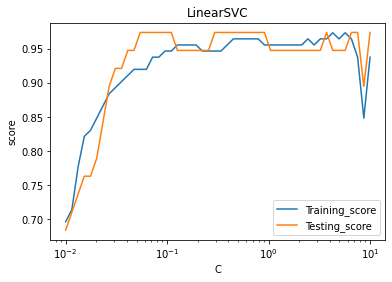

In [0]:
X_train, X_test, y_train, y_test = load_data_classification()
test_LinearSVC_C(X_train, X_test, y_train, y_test)# l1, l2 returns same score